In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.svm import SVC

In [5]:
water = pd.read_csv("water.csv", index_col="Unnamed: 0")

In [6]:
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0.0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0.0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0.0
...,...,...,...,...,...,...,...,...,...,...
2473,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
2474,7.808856,193.553212,17329.802160,8.061362,333.578349,392.449580,19.903225,66.396293,2.798243,1.0
2475,9.419510,175.762646,33155.578218,7.350233,333.578349,432.044783,11.039070,69.845400,3.298875,1.0
2476,5.126763,230.603758,11983.869376,6.303357,333.578349,402.883113,11.168946,77.488213,4.708658,1.0


In [7]:
water.Potability.value_counts()

1.0    1278
0.0    1200
Name: Potability, dtype: int64

In [8]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000
mean,7.070351,195.901323,22018.152811,7.139279,333.256035,426.434910,14.276804,66.410122,3.961962,0.515738
std,1.504529,33.289438,8803.279996,1.597340,39.309140,80.997820,3.317292,15.949891,0.781750,0.499853
min,0.227499,47.432000,320.942611,0.352000,129.000000,201.619737,2.200000,8.175876,1.450000,0.000000
25%,6.162214,176.283379,15596.765222,6.126996,311.618643,365.641745,12.065478,56.470637,3.439135,0.000000
50%,7.070351,196.696937,20966.659459,7.153583,333.578349,422.485813,14.229935,66.396293,3.951949,1.000000
75%,7.946553,216.425007,27360.608486,8.135316,355.477181,482.800158,16.562182,77.129153,4.501849,1.000000
max,14.000000,323.124000,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [5]:
X = water.drop(columns="Potability")
Y = water.Potability
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.80, random_state=42, stratify=Y)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
logit = LogisticRegression()
logit.fit(X_train, Y_train)

LogisticRegression()

In [8]:
logit.score(X_train, Y_train), logit.score(X_test, Y_test)

(0.5060544904137235, 0.5403225806451613)

In [10]:
pred1 = logit.predict(X_train)
pred_test1 = logit.predict(X_test)

print(confusion_matrix(Y_test, pred_test1))

print(classification_report(Y_test, pred_test1))

[[ 58 182]
 [ 46 210]]
              precision    recall  f1-score   support

         0.0       0.56      0.24      0.34       240
         1.0       0.54      0.82      0.65       256

    accuracy                           0.54       496
   macro avg       0.55      0.53      0.49       496
weighted avg       0.55      0.54      0.50       496



In [21]:
model1 = DecisionTreeClassifier(max_depth=5)
model1.fit(X_train, Y_train) 

DecisionTreeClassifier(max_depth=5)

In [22]:
model1.score(X_train, Y_train), model1.score(X_test, Y_test)

(0.7462159434914228, 0.6915322580645161)

In [23]:
pred2 = model1.predict(X_train)
pred_test2 = model1.predict(X_test)

print(confusion_matrix(Y_test, pred_test2))

print(classification_report(Y_test, pred_test2))

[[176  64]
 [ 89 167]]
              precision    recall  f1-score   support

         0.0       0.66      0.73      0.70       240
         1.0       0.72      0.65      0.69       256

    accuracy                           0.69       496
   macro avg       0.69      0.69      0.69       496
weighted avg       0.69      0.69      0.69       496



In [35]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=123)
cvscore_train = cross_val_score(estimator=model1, X=X_train, y=Y_train, cv=k_fold)

cvscore_train, cvscore_train.std(), cvscore_train.mean()

(array([0.69269521, 0.65994962, 0.70959596, 0.7020202 , 0.68181818]),
 0.017335765679806023,
 0.6892158359412768)

In [36]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=123)
cvscore_test = cross_val_score(estimator=model1, X=X_test, y=Y_test, cv=k_fold)

cvscore_test, cvscore_test.std(), cvscore_test.mean()

(array([0.61      , 0.63636364, 0.65656566, 0.57575758, 0.54545455]),
 0.0401704561130716,
 0.6048282828282828)

In [39]:
rf= RandomForestClassifier()
param_grid = [
{'n_estimators': [10, 25, 50,75,100], 
 'max_depth': [2, 3, 4, 5, 8, 10, 12, 15], 
 'bootstrap': [True, False],
 'max_features':["sqrt","auto","log2", 0.2, None]}
]

random_search = RandomizedSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, Y_train)

/Users/shubhamswarnakar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shubhamswarnakar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shubhamswarnakar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [2, 3, 4, 5, 8, 10, 12,
                                                       15],
                                         'max_features': ['sqrt', 'auto',
                                                          'log2', 0.2, None],
                                         'n_estimators': [10, 25, 50, 75,
                                                          100]}],
                   scoring='neg_mean_squared_error')

In [40]:
random_search.best_params_, random_search.best_estimator_

({'n_estimators': 75,
  'max_features': 'log2',
  'max_depth': 8,
  'bootstrap': False},
 RandomForestClassifier(bootstrap=False, max_depth=8, max_features='log2',
                        n_estimators=75))

In [42]:
rf= RandomForestClassifier(bootstrap=False, max_depth=8, max_features='log2',
                       n_estimators=75)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, max_depth=8, max_features='log2',
                       n_estimators=75)

In [43]:
rf.score(X_train, Y_train), rf.score(X_test, Y_test)

(0.9076690211907165, 0.7116935483870968)

In [44]:
pred3 = rf.predict(X_train)
pred_test3 = rf.predict(X_test)

print(confusion_matrix(Y_test, pred_test2))

print(classification_report(Y_test, pred_test2))

[[176  64]
 [ 89 167]]
              precision    recall  f1-score   support

         0.0       0.66      0.73      0.70       240
         1.0       0.72      0.65      0.69       256

    accuracy                           0.69       496
   macro avg       0.69      0.69      0.69       496
weighted avg       0.69      0.69      0.69       496



In [45]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 17, 20],
 "min_child_weight" : [0.25, 0.05, 0.5, 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [50, 100, 200, 150, 250, 300]  
}

xgb_clf=XGBClassifier()

random_search=RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=5, scoring='roc_auc',
                                 n_jobs=-1, cv=5, verbose=3, random_state=42)
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12, 15,
                                                      17, 20],
                                        'min_child_weight': [0.25, 0.05, 0.5, 1,
                                                             3, 5, 7],
                                        'n_estimators': [50, 100, 200, 150, 250,
                                                         300]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [47]:
random_search.best_params_, random_search.best_estimator_

({'n_estimators': 250,
  'min_child_weight': 1,
  'max_depth': 17,
  'learning_rate': 0.05,
  'gamma': 0.0,
  'colsample_bytree': 0.7},
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=17, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=250,
               n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, ...))

In [50]:
xgb_clf_1 = XGBClassifier(n_estimators=250, max_depth=17, min_child_weight=1,learning_rate= 0.05)
xgb_clf_1.fit(X_train, Y_train)
predictions = xgb_clf_1.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print("Classification Report")
print(classification_report(Y_test, predictions))


Confusion Matrix:
[[185  55]
 [ 77 179]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74       240
         1.0       0.76      0.70      0.73       256

    accuracy                           0.73       496
   macro avg       0.74      0.74      0.73       496
weighted avg       0.74      0.73      0.73       496



In [51]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=123)
cvscore_train = cross_val_score(estimator=xgb_clf_1, X=X_train, y=Y_train, cv=k_fold)

cvscore_train, cvscore_train.std(), cvscore_train.mean()

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=0.25, n_estimators=150;, score=0.744 total time=   2.3s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=1, n_estimators=200;, score=0.751 total time=   0.7s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=1, n_estimators=200;, score=0.705 total time=   0.6s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=17, min_child_weight=1, n_estimators=250;, score=0.776 total time=   6.6s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=0.25, n_estimators=200;, score=0.795 total time=   4.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=0.25, n_estimators=200;, score=0.782 total time=   4.4s
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weigh

(array([0.68010076, 0.697733  , 0.73484848, 0.73484848, 0.73232323]),
 0.022800936535572747,
 0.7159707910337633)

In [52]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=123)
cvscore_dt_test = cross_val_score(estimator=xgb_clf_1, X=X_test, y=Y_test, cv=k_fold)

cvscore_dt_test, cvscore_dt_test.std(), cvscore_dt_test.mean()

(array([0.69      , 0.66666667, 0.67676768, 0.67676768, 0.61616162]),
 0.0256497565131277,
 0.6652727272727272)

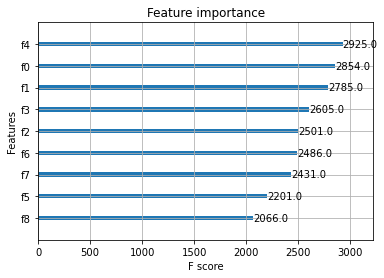

<Figure size 1440x1800 with 0 Axes>

In [55]:
import xgboost as xgb

xgb.plot_importance(xgb_clf_1)
plt.figure(figsize = (20, 25))
plt.show()

In [56]:
X.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.054873,-0.059621,0.002845,0.009547,0.016723,0.026679,0.015809,-0.031114
Hardness,0.054873,1.000000,-0.052946,-0.026845,-0.091405,-0.019862,0.008405,-0.004756,-0.012773
Solids,-0.059621,-0.052946,1.000000,-0.061321,-0.177602,0.011682,-0.006309,-0.009538,0.020198
Chloramines,0.002845,-0.026845,-0.061321,1.000000,0.034691,-0.018437,-0.020192,0.010925,0.000192
Sulfate,0.009547,-0.091405,-0.177602,0.034691,1.000000,-0.024858,0.024010,-0.024508,-0.011019
Conductivity,0.016723,-0.019862,0.011682,-0.018437,-0.024858,1.000000,0.019271,0.008446,-0.006655
Organic_carbon,0.026679,0.008405,-0.006309,-0.020192,0.024010,0.019271,1.000000,-0.009377,-0.015829
Trihalomethanes,0.015809,-0.004756,-0.009538,0.010925,-0.024508,0.008446,-0.009377,1.000000,-0.029348
Turbidity,-0.031114,-0.012773,0.020198,0.000192,-0.011019,-0.006655,-0.015829,-0.029348,1.000000


In [70]:
svm = SVC(random_state = 42)
svm.fit(X_train, Y_train)

SVC(random_state=42)

In [73]:

predictions = svm.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print("Classification Report")
print(classification_report(Y_test, predictions))


Confusion Matrix:
[[154  86]
 [ 81 175]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.66      0.64      0.65       240
         1.0       0.67      0.68      0.68       256

    accuracy                           0.66       496
   macro avg       0.66      0.66      0.66       496
weighted avg       0.66      0.66      0.66       496



In [66]:
param_grid={
    'C':[0.1,0.5,1,2,3,4,5],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[3,4,5,6,7]
    
}
grid_SVC=GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_SVC.fit(X_train,Y_train)
print(grid_SVC.best_params_,grid_SVC.best_score_)


{'C': 4, 'degree': 3, 'kernel': 'rbf'} 0.6558901356130574


In [74]:
svm_1 = SVC(random_state = 42, C=4, kernel='rbf')
svm_1.fit(X_train, Y_train)

SVC(C=4, random_state=42)

In [75]:
predictions = svm_1.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print("Classification Report")
print(classification_report(Y_test, predictions))


Confusion Matrix:
[[148  92]
 [ 92 164]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62       240
         1.0       0.64      0.64      0.64       256

    accuracy                           0.63       496
   macro avg       0.63      0.63      0.63       496
weighted avg       0.63      0.63      0.63       496



In [77]:
!pip install tensorflow

     |████████████████████████████████| 244.3 MB 4.4 kB/s eta 0:00:01     |█▊                              | 13.3 MB 11.6 MB/s eta 0:00:20     |█████████████████████▉          | 166.9 MB 2.4 MB/s eta 0:00:33
     |████████████████████████████████| 439 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 25.0 MB 3.8 MB/s eta 0:00:01     |█████████████████████▍          | 16.7 MB 2.9 MB/s eta 0:00:03
     |████████████████████████████████| 1.7 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 980 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 177 k

In [78]:

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD
from tensorflow.keras.layers import Activation
from sklearn.metrics import accuracy_score

2023-01-29 19:15:24.836861: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [88]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test,Y_test, test_size = 0.5, random_state = 42)

In [80]:
model = models.Sequential()

model.add(layers.Dense(16, input_shape=(9,)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(layers.Dense(32))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(layers.Dense(16))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(layers.Dense(1))
model.add(Activation("sigmoid"))

2023-01-29 19:17:10.849642: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [81]:
opt = Adam(learning_rate=0.001)

model.compile(loss="binary_crossentropy",
              optimizer=opt,
              metrics=['accuracy'])

In [82]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32)                0

In [83]:
tf.random.set_seed(0)

history = model.fit(X_train,
                    Y_train,
                    epochs=300,
                    batch_size=32,
                    validation_data=(X_val, Y_val),
                   )

Epoch 1/300
62/62 [==============================] - 4s 10ms/step - loss: 0.7439 - accuracy: 0.5252 - val_loss: 0.6690 - val_accuracy: 0.5968
Epoch 2/300
62/62 [==============================] - 0s 4ms/step - loss: 0.6822 - accuracy: 0.5621 - val_loss: 0.6607 - val_accuracy: 0.6008
Epoch 3/300
62/62 [==============================] - 0s 4ms/step - loss: 0.6636 - accuracy: 0.5832 - val_loss: 0.6545 - val_accuracy: 0.6169
Epoch 4/300
62/62 [==============================] - 0s 4ms/step - loss: 0.6557 - accuracy: 0.6044 - val_loss: 0.6445 - val_accuracy: 0.6210
Epoch 5/300
62/62 [==============================] - 0s 4ms/step - loss: 0.6464 - accuracy: 0.6181 - val_loss: 0.6351 - val_accuracy: 0.6331
Epoch 6/300
62/62 [==============================] - 0s 4ms/step - loss: 0.6409 - accuracy: 0.6196 - val_loss: 0.6268 - val_accuracy: 0.6250
Epoch 7/300
62/62 [==============================] - 0s 5ms/step - loss: 0.6321 - accuracy: 0.6468 - val_loss: 0.6206 - val_accuracy: 0.6613
Epoch 8/300


Epoch 59/300
62/62 [==============================] - 0s 4ms/step - loss: 0.5303 - accuracy: 0.7190 - val_loss: 0.6283 - val_accuracy: 0.6290
Epoch 60/300
62/62 [==============================] - 0s 4ms/step - loss: 0.5382 - accuracy: 0.7200 - val_loss: 0.6247 - val_accuracy: 0.6210
Epoch 61/300
62/62 [==============================] - 0s 4ms/step - loss: 0.5377 - accuracy: 0.7225 - val_loss: 0.6184 - val_accuracy: 0.6331
Epoch 62/300
62/62 [==============================] - 0s 6ms/step - loss: 0.5242 - accuracy: 0.7346 - val_loss: 0.6204 - val_accuracy: 0.6371
Epoch 63/300
62/62 [==============================] - 0s 4ms/step - loss: 0.5339 - accuracy: 0.7331 - val_loss: 0.6421 - val_accuracy: 0.6331
Epoch 64/300
62/62 [==============================] - 0s 4ms/step - loss: 0.5318 - accuracy: 0.7230 - val_loss: 0.6377 - val_accuracy: 0.6129
Epoch 65/300
62/62 [==============================] - 0s 6ms/step - loss: 0.5382 - accuracy: 0.7185 - val_loss: 0.6429 - val_accuracy: 0.6290
Epoch 

62/62 [==============================] - 0s 4ms/step - loss: 0.4711 - accuracy: 0.7619 - val_loss: 0.6583 - val_accuracy: 0.6613
Epoch 174/300
62/62 [==============================] - 0s 4ms/step - loss: 0.4709 - accuracy: 0.7624 - val_loss: 0.6661 - val_accuracy: 0.6613
Epoch 175/300
62/62 [==============================] - 0s 4ms/step - loss: 0.4726 - accuracy: 0.7669 - val_loss: 0.6551 - val_accuracy: 0.6532
Epoch 176/300
62/62 [==============================] - 0s 4ms/step - loss: 0.4711 - accuracy: 0.7608 - val_loss: 0.6611 - val_accuracy: 0.6532
Epoch 177/300
62/62 [==============================] - 0s 4ms/step - loss: 0.4692 - accuracy: 0.7709 - val_loss: 0.6712 - val_accuracy: 0.6371
Epoch 178/300
62/62 [==============================] - 0s 4ms/step - loss: 0.4599 - accuracy: 0.7810 - val_loss: 0.6687 - val_accuracy: 0.6452
Epoch 179/300
62/62 [==============================] - 0s 4ms/step - loss: 0.4724 - accuracy: 0.7669 - val_loss: 0.6642 - val_accuracy: 0.6331
Epoch 180/300

62/62 [==============================] - 0s 4ms/step - loss: 0.4454 - accuracy: 0.7911 - val_loss: 0.6884 - val_accuracy: 0.6532
Epoch 288/300
62/62 [==============================] - 0s 4ms/step - loss: 0.4594 - accuracy: 0.7810 - val_loss: 0.7020 - val_accuracy: 0.6492
Epoch 289/300
62/62 [==============================] - 0s 4ms/step - loss: 0.4562 - accuracy: 0.7780 - val_loss: 0.6972 - val_accuracy: 0.6452
Epoch 290/300
62/62 [==============================] - 0s 4ms/step - loss: 0.4513 - accuracy: 0.7820 - val_loss: 0.6809 - val_accuracy: 0.6452
Epoch 291/300
62/62 [==============================] - 0s 4ms/step - loss: 0.4479 - accuracy: 0.7785 - val_loss: 0.6798 - val_accuracy: 0.6653
Epoch 292/300
62/62 [==============================] - 0s 4ms/step - loss: 0.4517 - accuracy: 0.7775 - val_loss: 0.6887 - val_accuracy: 0.6573
Epoch 293/300
62/62 [==============================] - 0s 4ms/step - loss: 0.4459 - accuracy: 0.7941 - val_loss: 0.6893 - val_accuracy: 0.6573
Epoch 294/300

In [84]:
score = model.evaluate(X_test, Y_test, verbose=1)

print("Test Error", score[0])
print("Test accuracy", score[1])

8/8 [==============================] - 0s 5ms/step - loss: 0.7022 - accuracy: 0.6573
Test Error 0.7022398114204407
Test accuracy 0.6572580933570862


In [85]:
xgb_clf_final = XGBClassifier(n_estimators=250, max_depth=17, min_child_weight=1,learning_rate= 0.05)
xgb_clf_final.fit(X_train, Y_train)
predictions_test = xgb_clf_final.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions_test))

print("Classification Report")
print(classification_report(Y_test, predictions_test))


Confusion Matrix:
[[98 25]
 [45 80]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.69      0.80      0.74       123
         1.0       0.76      0.64      0.70       125

    accuracy                           0.72       248
   macro avg       0.72      0.72      0.72       248
weighted avg       0.72      0.72      0.72       248



In [90]:
predictions_val = xgb_clf_final.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(Y_val, predictions_val))

print("Classification Report")
print(classification_report(Y_val, predictions_val))


Confusion Matrix:
[[48 15]
 [24 37]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.67      0.76      0.71        63
         1.0       0.71      0.61      0.65        61

    accuracy                           0.69       124
   macro avg       0.69      0.68      0.68       124
weighted avg       0.69      0.69      0.68       124

